In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,490
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,394
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,152
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,215
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,159
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,159
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,197
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,468


## data preparation

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(len(y_train),1))
y_train = y_train.reshape(len(y_train),) # for regressor

## svr and grid search

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [17]:
# parameters = [{'C':[100, 1000],
#                'kernel':['rbf'],
#                'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]

In [18]:
# grid_search = GridSearchCV(estimator = SVR(),
#                            param_grid = parameters,
#                            scoring = 'r2',
#                            cv = 10,
# #                            n_jobs = -1,
#                           )

In [19]:
# start = time.time()

# grid_search = grid_search.fit(X_train, y_train)

# stop = time.time()
# print('\n',(stop-start)//60,'min.')

In [20]:
# grid_search.best_score_

In [21]:
# grid_search.best_params_

In [22]:
# pd.DataFrame(grid_search.cv_results_)

In [23]:
start = time.time()

model = SVR(C = 1000,kernel = 'rbf',gamma = 0.1)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 479.0 min.


## model evaluation

In [24]:
from sklearn.metrics import r2_score

In [25]:
predictions = model.predict(X_test)

In [26]:
predictions = sc_y.inverse_transform(predictions)

In [27]:
r2_score(y_test,predictions)

0.25906328798395073

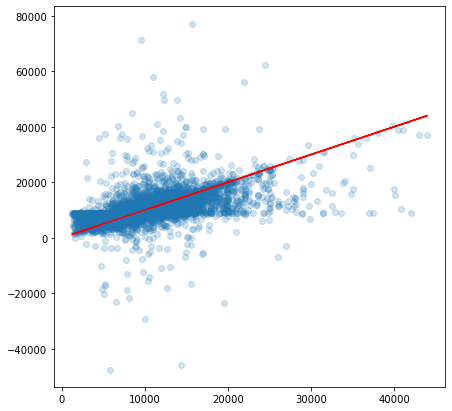

In [28]:
plt.figure(figsize=(7,7))
# plt.xlim(700,2500)
# plt.ylim(0,500)

# predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# perfect predictions
plt.plot(y_test,y_test,'r')

In [29]:
predictions

array([11300.9584945 , 10000.36696825,  7414.20844991, ...,
        8706.69023722, 10322.95894088,  5044.35525466])

In [30]:
predictions[:20]/y_test[:20]

array([1.06612816, 0.80048168, 0.99131478, 1.11129224, 0.82549254,
       1.28367491, 0.95416058, 0.89001298, 1.04960499, 1.06577049,
       0.67482694, 1.00735986, 0.98684052, 1.05754472, 1.01228352,
       1.24051721, 1.3243079 , 0.94829799, 1.08565961, 0.79882243])

## k-Fold Cross Validation

In [32]:
# from sklearn.model_selection import cross_val_score

In [ ]:
# accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

In [ ]:
# accuracies.mean()

In [ ]:
# accuracies.std()

In [ ]:
# accuracies